## **1. Library Import**

In [41]:
import json
import phik
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

## **2. Data Loading**

In [2]:
# Load dataset from project folder
df = pd.read_csv("/Users/Shared/Workspaces/Portofolio/Linier-Regression/House-Price-Prediction/House-Price-Prediction-using-Machine-Learning/data/raw/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **3. Feature Engineering**

#### **3.1. Split X and Y**

In [3]:
# Split dataFrame into X (parameters value) and y (target value)

X = df.drop(['price'],axis=1)
y = df['price']

In [4]:
y.head(10)

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
6    10150000
7    10150000
8     9870000
9     9800000
Name: price, dtype: int64

In [5]:
X.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


#### **3.2. Split between Categorical & Numerical Columns**

In [6]:
# Identify numerical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Identify categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numerical Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

Categorical Columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


#### **3.3. Cardinality Handling**

In [7]:
# looping for display the total of unique value and all unique values of category column to identify cardinality

for i in cat_cols:
    print(f'Total of unique value from {i} column : {X[i].nunique()}')
    print(f'Unique value from {i} column : {X[i].unique()}')
    print('')

Total of unique value from mainroad column : 2
Unique value from mainroad column : ['yes' 'no']

Total of unique value from guestroom column : 2
Unique value from guestroom column : ['no' 'yes']

Total of unique value from basement column : 2
Unique value from basement column : ['no' 'yes']

Total of unique value from hotwaterheating column : 2
Unique value from hotwaterheating column : ['no' 'yes']

Total of unique value from airconditioning column : 2
Unique value from airconditioning column : ['yes' 'no']

Total of unique value from prefarea column : 2
Unique value from prefarea column : ['yes' 'no']

Total of unique value from furnishingstatus column : 3
Unique value from furnishingstatus column : ['furnished' 'semi-furnished' 'unfurnished']



**Cardinality Handling**

Based on the inspection of categorical variables, all binary features contain only two unique values (`yes` / `no`), while `furnishingstatus` contains three categories.

Since all categorical variables have low cardinality (≤ 3 unique values), no special cardinality handling is required.

#### **3.4. Train-Test Split**

In [8]:
# Split X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (436, 12)
Test Size:  (109, 12)


#### **3.5. Missing Value Handling**

In [9]:
# Check the missing value at X_train

X_train.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
# Check thw missing value at X_test

X_test.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
# Check thw missing value at y_train

y_train.isnull().sum()

0

In [12]:
# Check thw missing value at y_test

y_test.isnull().sum()

0

**Missing Value Handling**

After performing the train-test split, both `X_train`, `X_test`, `y_train`, and `y_test` were checked for missing values.

No missing values were found in any of the datasets. Therefore, no missing value imputation or handling is required at this stage.

The data is complete and ready for preprocessing and modeling.

#### **3.6. Outlier Handling**

In [13]:
# Continous & Discrete Numerical Features

continuous_cols = []
discrete_cols = []

for col in X_train.select_dtypes(include=["int64", "float64"]).columns:
    if X_train[col].nunique() > 15:
        continuous_cols.append(col)
    else:
        discrete_cols.append(col)

print("Continuous Columns:", continuous_cols)
print("Discrete Columns:", discrete_cols)

Continuous Columns: ['area']
Discrete Columns: ['bedrooms', 'bathrooms', 'stories', 'parking']


In [14]:
# Function to check skewness
def check_skewness(df, columns):
    return {col: df[col].skew() for col in columns if col in df.columns}


# Skewness for continuous variables
continuous_skew = check_skewness(X_train, continuous_cols)

print("Skewness - Continuous Columns")
for col, skew in continuous_skew.items():
    print(f"{col}: {skew}")


# Skewness for discrete variables
discrete_skew = check_skewness(X_train, discrete_cols)

print("\nSkewness - Discrete Columns")
for col, skew in discrete_skew.items():
    print(f"{col}: {skew}")

Skewness - Continuous Columns
area: 1.2696746040595912

Skewness - Discrete Columns
bedrooms: 0.4827291572344568
bathrooms: 1.6603970013558165
stories: 1.0727086074527674
parking: 0.889456117142945


In [15]:
# Function to categorize columns based on skewness values
def categorize_skewness(skewness_dict):
    normal_columns = []
    skewed_columns = []
    extreme_skewed_columns = []

    for col, skewness in skewness_dict.items():
        if skewness < -1.0 or skewness > 1.0:
            extreme_skewed_columns.append(col)
        elif abs(skewness) <= 0.5:
            normal_columns.append(col)
        else:
            skewed_columns.append(col)

    return normal_columns, skewed_columns, extreme_skewed_columns

In [16]:
# Continous Skewness Category

normal_cont, skewed_cont, extreme_cont = categorize_skewness(continuous_skew)

print("Continuous Columns")
print("Normal:", normal_cont)
print("Skewed:", skewed_cont)
print("Extreme Skewed:", extreme_cont)

Continuous Columns
Normal: []
Skewed: []
Extreme Skewed: ['area']


In [17]:
# Discrete Skewness Category

normal_disc, skewed_disc, extreme_disc = categorize_skewness(discrete_skew)

print("\nDiscrete Columns")
print("Normal:", normal_disc)
print("Skewed:", skewed_disc)
print("Extreme Skewed:", extreme_disc)


Discrete Columns
Normal: ['bedrooms']
Skewed: ['parking']
Extreme Skewed: ['bathrooms', 'stories']


In [18]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print("Discrete Outlier Percentage")
print(calculate_outlier_percentages_normal(X_train, normal_disc))

Discrete Outlier Percentage
Percentage of outliers in bedrooms: 0.23%
None


In [19]:
# Create function to calculate outlier percentages for skew
def calculate_outlier_percentages_skew(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.3f}%'.format(variable, outlier_percentage))

# Calcuate outlier percentages before handling
print("Continous Outlier Percentage")
print(calculate_outlier_percentages_skew(X_train, extreme_cont, 3))

print()
print("Discrete Outlier Percentage")
print(calculate_outlier_percentages_skew(X_train, skewed_disc, 1.5))
print(calculate_outlier_percentages_skew(X_train, extreme_disc, 3))

Continous Outlier Percentage
Percentage of outliers in area: 0.459%
None

Discrete Outlier Percentage
Percentage of outliers in parking: 2.064%
None
Percentage of outliers in bathrooms: 0.000%
Percentage of outliers in stories: 0.000%
None


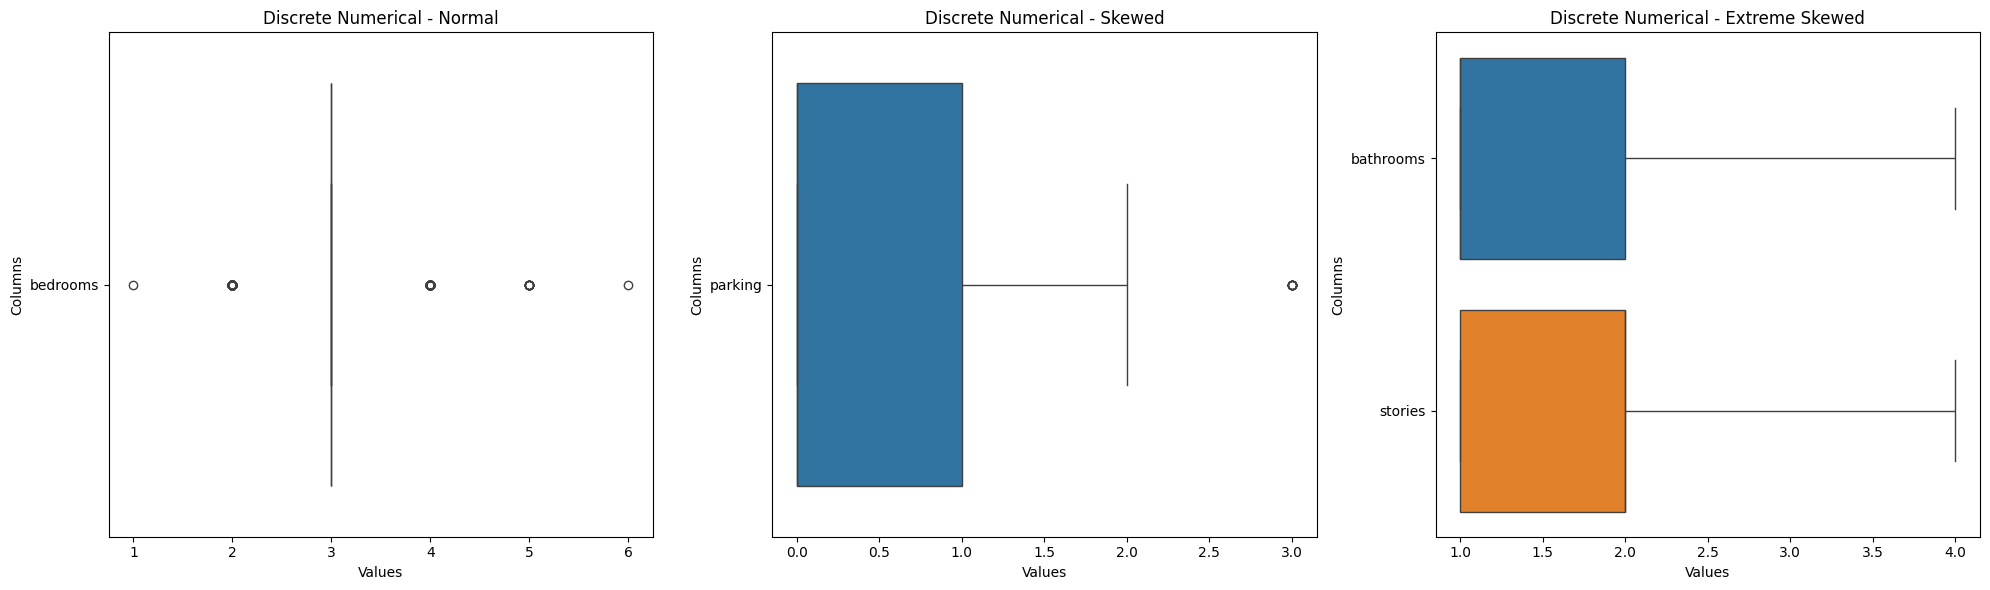

In [20]:
# Create figure with three subplots for discrete columns only
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot for normal discrete columns
if normal_disc:
    sns.boxplot(data=X_train[normal_disc], orient="h", ax=axes[0])
    axes[0].set_title("Discrete Numerical - Normal")
    axes[0].set_xlabel("Values")
    axes[0].set_ylabel("Columns")
else:
    axes[0].set_visible(False)

# Boxplot for skewed discrete columns
if skewed_disc:
    sns.boxplot(data=X_train[skewed_disc], orient="h", ax=axes[1])
    axes[1].set_title("Discrete Numerical - Skewed")
    axes[1].set_xlabel("Values")
    axes[1].set_ylabel("Columns")
else:
    axes[1].set_visible(False)

# Boxplot for extreme skewed discrete columns
if extreme_disc:
    sns.boxplot(data=X_train[extreme_disc], orient="h", ax=axes[2], whis=3)
    axes[2].set_title("Discrete Numerical - Extreme Skewed")
    axes[2].set_xlabel("Values")
    axes[2].set_ylabel("Columns")
else:
    axes[2].set_visible(False)

plt.tight_layout()
plt.show()

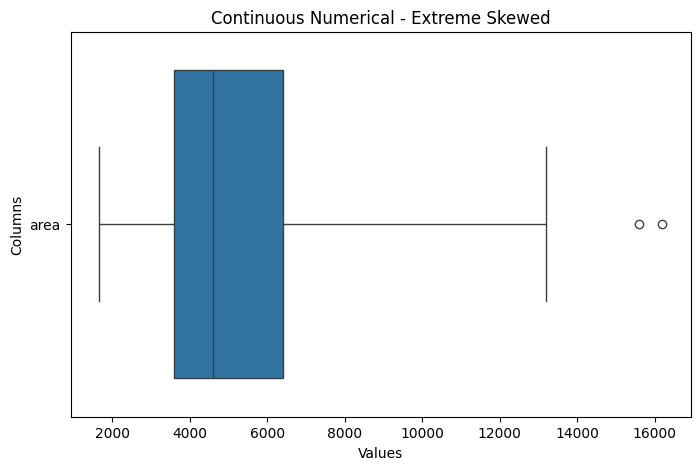

In [21]:
# Boxplot for extreme continuous columns
plt.figure(figsize=(8,5))

sns.boxplot(
    data=X_train[extreme_cont],
    orient="h",
    whis=3  # more tolerant outlier boundary
)

plt.title("Continuous Numerical - Extreme Skewed")
plt.xlabel("Values")
plt.ylabel("Columns")

plt.show()


**Outlier Assessment and Treatment Decision**

Based on the IQR method, the percentage of detected outliers across both continuous and discrete numerical variables is very low.

For the continuous variable `area`, the outlier percentage is only **0.459%**. Although the distribution is right-skewed (skewness = 1.27) and a few extreme values appear on the upper tail in the boxplot, these values represent realistic variations in property size rather than data entry errors.

For discrete variables:
- `parking` shows **2.064%** outliers,
- `bedrooms` shows **0.23%** outliers,
- `bathrooms` and `stories` show **0.000%** outliers.

These values reflect natural differences in housing characteristics and do not indicate anomalies.

Given that:
- The proportion of outliers is statistically negligible,
- The extreme values are contextually valid,
- The dataset size is relatively small (545 observations),

No outlier capping or winsorizing is applied.


## **4. Modelling**

#### **4.1. Model Pipeline**

In [25]:
# Preprocessing for Pipeline

## Combine skewness categories for numerical features
normal_cols = normal_cont + normal_disc
skewed_cols = skewed_cont + skewed_disc
extreme_cols = extreme_cont + extreme_disc

## Build preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Apply StandardScaler to normally distributed features
        ("normal_scaling", StandardScaler(), normal_cols),
        
        # Apply MinMaxScaler to moderately and highly skewed features
        ("skewed_scaling", MinMaxScaler(), skewed_cols + extreme_cols),
        
        # Apply OneHotEncoder to categorical features
        ("categorical", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)])

In [26]:
# Model Definition

## Linear Regression
linear_model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

## Ridge Regression
ridge_model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

## Lasso Regression
lasso_model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", Lasso(alpha=0.01, max_iter=10000))
])

#### **4.2. Model Training**

In [28]:
# Train models : Linier Regression
linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_scaling',
                                                  StandardScaler(),
                                                  ['bedrooms']),
                                                 ('skewed_scaling',
                                                  MinMaxScaler(),
                                                  ['parking', 'area',
                                                   'bathrooms', 'stories']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [29]:
# Train models : Ridge Regression
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_scaling',
                                                  StandardScaler(),
                                                  ['bedrooms']),
                                                 ('skewed_scaling',
                                                  MinMaxScaler(),
                                                  ['parking', 'area',
                                                   'bathrooms', 'stories']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('regressor', Ridge())])

In [30]:
# Train models : Lasso Regression
lasso_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('normal_scaling',
                                                  StandardScaler(),
                                                  ['bedrooms']),
                                                 ('skewed_scaling',
                                                  MinMaxScaler(),
                                                  ['parking', 'area',
                                                   'bathrooms', 'stories']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('regressor', Lasso(alpha=0.01, max_iter=10000))])

#### **4.3. Model Prediction**

In [31]:
# Predict
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

#### **4.4. Model Evaluation**

In [33]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate regression model performance.

    Parameters:
    ----------
    y_true : array-like
        Actual target values.
    y_pred : array-like
        Predicted target values from the model.
    model_name : str
        Name of the regression model.

    Returns:
    -------
    None
        Prints evaluation metrics including MAE, RMSE, and R².
    """

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 40)

# Evaluation
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


Model: Linear Regression
Mean Absolute Error (MAE): 839970.48
Root Mean Squared Error (RMSE): 1095188.90
R-squared (R²): 0.6764
----------------------------------------
Model: Ridge Regression
Mean Absolute Error (MAE): 846539.39
Root Mean Squared Error (RMSE): 1100150.61
R-squared (R²): 0.6735
----------------------------------------
Model: Lasso Regression
Mean Absolute Error (MAE): 839970.48
Root Mean Squared Error (RMSE): 1095188.92
R-squared (R²): 0.6764
----------------------------------------


#### **4.5. Cross Validation**

In [40]:
# Define 5-fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store regression models for comparison
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model
}

# Initialize variables to track best model
best_model_name = None
best_score = -np.inf

# Perform cross-validation for each model
for name, model in models.items():
    
    # Compute cross-validation R² scores
    cv_scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=kf,
        scoring="r2",
        n_jobs=-1)
    
    # Display performance summary
    print(name)
    print("R² - All Folds:", cv_scores)
    print("R² - Mean:", cv_scores.mean())
    print("R² - Std:", cv_scores.std())
    print("Performance Range:",
          cv_scores.mean() - cv_scores.std(),
          "-",
          cv_scores.mean() + cv_scores.std())
    print("-" * 50)

    # Update best model based on highest mean R²
    if cv_scores.mean() > best_score:
        best_score = cv_scores.mean()
        best_model_name = name

# Print best performing model
print("Best Model:", best_model_name)
print("Best Cross-Validation Mean R²:", best_score)


Linear Regression
R² - All Folds: [0.54478497 0.69914479 0.65754942 0.75067621 0.63556119]
R² - Mean: 0.6575433172863754
R² - Std: 0.06870527880227428
Performance Range: 0.5888380384841011 - 0.7262485960886497
--------------------------------------------------
Ridge Regression
R² - All Folds: [0.54939304 0.69090994 0.65894016 0.74968022 0.63510905]
R² - Mean: 0.6568064803149146
R² - Std: 0.0660326537966957
Performance Range: 0.590773826518219 - 0.7228391341116103
--------------------------------------------------
Lasso Regression
R² - All Folds: [0.54478498 0.69914479 0.65754942 0.75067621 0.6355612 ]
R² - Mean: 0.6575433200298013
R² - Std: 0.06870527385028675
Performance Range: 0.5888380461795145 - 0.7262485938800881
--------------------------------------------------
Best Model: Lasso Regression
Best Cross-Validation Mean R²: 0.6575433200298013


**Cross Validation Result**

Based on cross-validation results, Lasso Regression achieved the highest mean R² score, although the performance difference compared to Linear Regression is negligible.

Unlike Ordinary Least Squares (OLS), Lasso Regression applies L1 regularization, which introduces a penalty term to shrink model coefficients. Due to this regularization mechanism, classical linear regression assumptions (such as strict normality of residuals, homoscedasticity, and absence of multicollinearity) are not strictly required.

Regularized models like Lasso are primarily optimized for predictive performance and generalization rather than statistical inference. Therefore:

- Residual normality is not a strict requirement.
- Homoscedasticity is not mandatory for valid predictions.
- Multicollinearity is naturally mitigated through coefficient shrinkage.

Given that:
- Cross-validation results show stable performance across folds,
- There is no indication of overfitting,
- Regularization improves model robustness,

The model is considered statistically adequate for prediction purposes without requiring strict validation of classical OLS assumptions.

If the objective were statistical inference or coefficient interpretation, classical assumption testing would be more critical. However, for predictive modeling, cross-validation performance remains the primary evaluation criterion.


#### **4.7. Hyperparameter Tuning**

In [42]:
# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define alpha search space using log scale
alpha_grid = np.logspace(-4, 2, 30)

# Build Lasso pipeline
lasso_pipe = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", Lasso(max_iter=10000))])

# Define parameter grid
lasso_params = {
    "regressor__alpha": alpha_grid}

# Initialize GridSearchCV
lasso_search = GridSearchCV(
    lasso_pipe,
    param_grid=lasso_params,
    cv=kf,
    scoring="r2",
    n_jobs=-1)

# Fit grid search
lasso_search.fit(X_train, y_train)

# Display best results
print("Best Cross-Validation R²:", lasso_search.best_score_)
print("Best Alpha:", lasso_search.best_params_["regressor__alpha"])


Best Cross-Validation R²: 0.6575699539521495
Best Alpha: 100.0


**Tuned Lasso Regression**

Hyperparameter tuning was conducted on the Lasso Regression model using GridSearchCV with 5-fold cross-validation to identify the optimal regularization strength (`alpha`).

The best cross-validation R² score achieved was **0.65757**, with an optimal alpha value of **100.0**. Although the improvement over the baseline model was marginal, the tuned configuration demonstrated slightly better average performance and maintained consistent results across folds.

Therefore, the tuned Lasso Regression model is adopted as the final predictive model for house price estimation.


In [43]:
# Get best model from GridSearch
best_lasso = lasso_search.best_estimator_

# Predict on test data
y_pred_best = best_lasso.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Tuned Lasso Performance (Test Set)")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Tuned Lasso Performance (Test Set)
MAE: 840015.1551992721
RMSE: 1095370.4491728744
R²: 0.6762908703525898


**Final Model Selection – Tuned Lasso Regression**

Hyperparameter tuning was conducted on the Lasso Regression model using GridSearchCV with 5-fold cross-validation to identify the optimal regularization strength (`alpha`).

The best cross-validation R² score achieved was **0.65757**, with an optimal alpha value of **100.0**. Although the improvement over the baseline model was marginal, the tuned configuration demonstrated slightly better average performance and maintained consistent results across folds.

When evaluated on the test set, the tuned Lasso model achieved the following performance:

- **MAE:** 840,015  
- **RMSE:** 1,095,370  
- **R2:** 0.6763  

These results are consistent with the cross-validation performance, indicating stable generalization and no significant overfitting. The model is able to explain approximately **67.6% of the variance** in house prices, which is considered strong performance given the limited number of available features.

Therefore, the tuned Lasso Regression model is adopted as the final predictive model for house price estimation.


## **5. Model Saving**

In [44]:
# Save trained pipeline model to file
with open("tuned_lasso_model.pkl", "wb") as f:
    pickle.dump(best_lasso, f)

print("Model successfully saved as tuned_lasso_model.pkl")

Model successfully saved as tuned_lasso_model.pkl
